In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

sns.set()

df_wo_inf = pd.read_csv("csvs_final/all_data_final_no_inf.csv")
df_with_inf =  pd.read_csv("csvs_final/all_data_final_with_inf.csv")

df_ss_no_inf = pd.read_csv("csvs_final_subset_paths/all_data_final_no_inf.csv")
df_ss = pd.read_csv("csvs_final_subset_paths/all_data_final.csv")

df_ss['hierarchy'] = df_ss['hierarchy'] + df_ss['method']
df_ss_no_inf['hierarchy'] = df_ss_no_inf['hierarchy'] + df_ss_no_inf['method']

baseline_fillup = pd.read_csv("csvs_final/baseline_fillup.csv")

In [16]:
# to fix errors with saving the pdf https://stackoverflow.com/a/60384073/2745116
from matplotlib import rc
plt.rcParams['pdf.fonttype'] = 42

In [20]:
# map original labels to something else
# only consider k=3 here
label_mapping = {
    '[1]': r'$\hat{k}=1$, full',
#     '[2]': r'$\hat{k}=2$',
    '[2, 4]': r'$\hat{k}=3$, full',
    '[2, 4]two_paths': r'$\hat{k}=3$, 2p',
    '[2, 4]one_path': r'$\hat{k}=3$, 1p',
}

def mapped_labels(original_labels):
    return [label_mapping[l] for l in original_labels]

In [21]:
# combine df with normal/full advertisment & reduced advertisement
# only select central baseline and k=3; sort
full_df_wo_inf = df_ss_no_inf.append(df_wo_inf)
sub_df_wo_inf = full_df_wo_inf[full_df_wo_inf['hierarchy'].isin(label_mapping.keys())]
sub_df_wo_inf = sub_df_wo_inf.sort_values(by='hierarchy')

['[1]' '[2, 4]' '[2, 4]one_path' '[2, 4]two_paths']


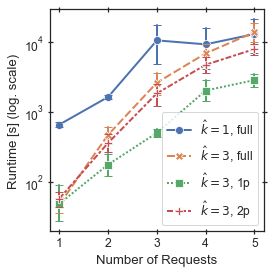

In [22]:
# sns_plot = sns.relplot(data=sub_df_wo_inf, x="request_count", markers=True, y="runtime", style="hierarchy", kind="line", legend='full')
# sns_plot.set(xlabel='Amount of VNF requests', ylabel='Runtime in ms [log]')
# ax = sns_plot.axes[0][0]
# ax.set_yscale("log")
# # plt.legend(title='Approach', loc='lower right', labels=['Baseline', '[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])
# sns_plot.savefig("final_figs_3/final_runtimes_24.pdf")

def plot_runtime(df):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.set(font_scale=1.1, style='white', rc={'lines.linewidth': 2})
    
    print(df['hierarchy'].unique())
    sns.lineplot(df['request_count'], df['runtime'] / 1000, hue=df['hierarchy'], style=df['hierarchy'], markers=True, markersize=8, legend=False,
                err_style='bars', err_kws={'capsize': 4})
    
    ax.set_xlabel('Number of Requests')
    ax.set_ylabel('Runtime [s] (log. scale)')
    ax.set_yscale('log')
    ax.tick_params(axis='both', direction='inout', length=5, bottom=True, left=True, right=True, top=True)
    plt.legend(labels=mapped_labels(df['hierarchy'].unique()))
    
    plt.tight_layout()
    fig.savefig('final_figs/adv_runtime.pdf')
    
plot_runtime(sub_df_wo_inf)

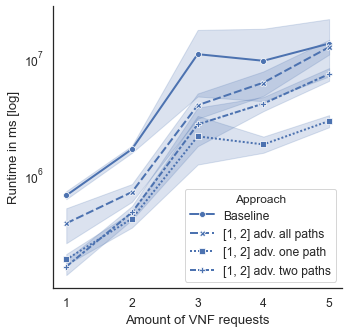

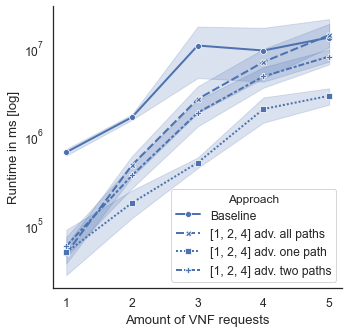

In [23]:
## runtime plots


df_bsline_wo_inf = df_wo_inf[(df_wo_inf.hierarchy=='[1]') | (df_wo_inf.hierarchy=='[2]') | (df_wo_inf.hierarchy=='[2, 4]')]
df_bsline_w_inf = df_with_inf = df_with_inf[(df_with_inf.hierarchy=='[1]') | (df_with_inf.hierarchy=='[2]') | (df_with_inf.hierarchy=='[2, 4]')]



full_df_wo_inf = df_ss_no_inf.append(df_bsline_wo_inf)
full_df_with_inf= df_ss.append(df_bsline_w_inf)


sub_df_wo_inf = full_df_wo_inf[(full_df_wo_inf.hierarchy=="[1]") | (full_df_wo_inf.hierarchy=="[2]") | (full_df_wo_inf.hierarchy=="[2]one_path") | (full_df_wo_inf.hierarchy=="[2]two_paths")]

sub_df_wo_inf = sub_df_wo_inf.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=sub_df_wo_inf, x="request_count", markers=True, y="runtime", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Runtime in ms [log]')
ax = sns_plot.axes[0][0]
ax.set_yscale("log")
plt.legend(title='Approach', loc='lower right', labels=['Baseline', '[1, 2] adv. all paths', '[1, 2] adv. one path' , '[1, 2] adv. two paths'])
sns_plot.savefig("final_figs_3/final_runtimes_2.pdf")


sub_df_wo_inf = full_df_wo_inf[(full_df_wo_inf.hierarchy=="[1]") | (full_df_wo_inf.hierarchy=="[2, 4]") | (full_df_wo_inf.hierarchy=="[2, 4]one_path") | (full_df_wo_inf.hierarchy=="[2, 4]two_paths")]

sub_df_wo_inf = sub_df_wo_inf.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=sub_df_wo_inf, x="request_count", markers=True, y="runtime", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Runtime in ms [log]')
ax = sns_plot.axes[0][0]
ax.set_yscale("log")
plt.legend(title='Approach', loc='lower right', labels=['Baseline', '[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])
sns_plot.savefig("final_figs_3/final_runtimes_24.pdf")


In [ ]:
# with inf

distances = pd.DataFrame(columns=["hierarchy", "gurobi_seed", "vnf_requests_id","requests_count", "placements_distance", "total_delay_distance"])

needed_runs = set()

for (i, gurobi_seed, hierarchy_id, hierarchy, hierarchy_paths, graph_path, vnf_requests_id, ingr_egr, requests_count, vnf_requests_path, placements, runtime, avg_total_delay,avg_e2e_delay,sum_total_delay,sum_e2e_delay, method) in full_df_with_inf.itertuples():
   # print("hierarchy: {}, gurobi_seed:{}, vnf_requests_id:{}, placements:{}, s_total_delay:{}".format(hierarchy, gurobi_seed, vnf_requests_id,placements, sum_total_delay))
    # now placement distance ->
    if hierarchy == '[1]' or '[2, 4]' in hierarchy:
        # no loss for baseline
        continue
    next_gurobi_seed = int(gurobi_seed)
    opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
    ctr = 0
    while len(opt) == 0 and ctr < 5:
        next_gurobi_seed = int(next_gurobi_seed) + 1 % 5
        opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
        ctr += 1
    if len(opt) == 0:
        print("Baseline failed...")
        continue
    
    if placements == 'INFEASIBLE':
        distance = float(opt['placements'])
    else:
        distance = float(abs(float(placements)-float(opt['placements'])))
        
    if distance == 0:
        tot_delay_distance = abs(sum_total_delay - opt['sum_total_delay'])
        avg_e2e_delay_distance = abs(avg_e2e_delay - opt['avg_e2e_delay'] )
        sum_e2e_delay_distance = abs(sum_e2e_delay - opt['sum_e2e_delay'])
        
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':float(tot_delay_distance), 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)
    else:
        if placements == 'INFEASIBLE':
            tot_delay_distance = float(opt['sum_total_delay'])
            avg_e2e_delay_distance=float(opt['avg_e2e_delay'])
        else:
            
            bs_fillup = baseline_fillup.query("vnf_requests_id == {} & placements == {}".format(vnf_requests_id, placements))
            tot_delay_opt = bs_fillup['sum_total_delay']
            tot_delay_distance = abs(float(sum_total_delay) - float(tot_delay_opt))
            avg_e2e_delay_opt = bs_fillup['avg_e2e_delay']
            avg_e2e_delay_distance = abs(float(avg_e2e_delay) - float(avg_e2e_delay_opt))
            sum_e2e_delay_opt = bs_fillup['sum_e2e_delay']
            sum_e2e_delay_distance = abs(float(sum_e2e_delay) - float(sum_e2e_delay_opt))
            
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':tot_delay_distance, 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)

distances = distances.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="placements_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. placements')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2] adv. all paths', '[1, 2] adv. one path' , '[1, 2] adv. two paths'])

sns_plot.savefig("final_figs_3/2_plcmt_distance_w.pdf")


sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="total_delay_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. sum of total delay [ms]')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2] adv. all paths', '[1, 2] adv. one path' , '[1, 2] adv. two paths'])

plt.xticks(np.arange(1,6,1))
ax1= sns_plot.axes[0][0]

avg_delay = 1.342150105084392
ax1.axhline(avg_delay, ls=':', color='orange', alpha=0.6)
ax1.text(5.3, avg_delay - .1, "1 avg. hop")
ax1.text(5.3, 2 * avg_delay - .1, "2 avg. hops")
ax1.text(5.3, 3* avg_delay - .1, "3 avg. hops")
ax1.text(5.3, 4*avg_delay -.1, "4 avg. hops")
ax1.text(5.3, 5*avg_delay-.1, "5 avg. hops")
ax1.text(5.3, 6*avg_delay-.1, "6 avg. hops")
ax1.text(5.3, 7*avg_delay-.1, "7 avg. hops")
ax1.axhline(2 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(3 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(4 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(5 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(6 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(7 * avg_delay, ls=':', color='orange', alpha=0.6)

sns_plot.savefig("final_figs_3/2_delay_distance_w.pdf")


In [ ]:
# without inf

distances = pd.DataFrame(columns=["hierarchy", "gurobi_seed", "vnf_requests_id","requests_count", "placements_distance", "total_delay_distance"])

needed_runs = set()

for (i, gurobi_seed, hierarchy_id, hierarchy, hierarchy_paths, graph_path, vnf_requests_id, ingr_egr, requests_count, vnf_requests_path, placements, runtime, avg_total_delay,avg_e2e_delay,sum_total_delay,sum_e2e_delay, method) in full_df_wo_inf.itertuples():
   # print("hierarchy: {}, gurobi_seed:{}, vnf_requests_id:{}, placements:{}, s_total_delay:{}".format(hierarchy, gurobi_seed, vnf_requests_id,placements, sum_total_delay))
    # now placement distance ->
    if hierarchy == '[1]' or '[2, 4]' in hierarchy:
        # no loss for baseline
        continue
    next_gurobi_seed = int(gurobi_seed)
    opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
    ctr = 0
    while len(opt) == 0 and ctr < 5:
        next_gurobi_seed = int(next_gurobi_seed) + 1 % 5
        opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
        ctr += 1
    if len(opt) == 0:
        print("Baseline failed...")
        continue
    
    if placements == 'INFEASIBLE':
        distance = float(opt['placements'])
        continue
    else:
        distance = float(abs(float(placements)-float(opt['placements'])))
        
    if distance == 0:
        tot_delay_distance = abs(sum_total_delay - opt['sum_total_delay'])
        avg_e2e_delay_distance = abs(avg_e2e_delay - opt['avg_e2e_delay'] )
        sum_e2e_delay_distance = abs(sum_e2e_delay - opt['sum_e2e_delay'])
        
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':float(tot_delay_distance), 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)
    else:
        if placements == 'INFEASIBLE':
            tot_delay_distance = float(opt['sum_total_delay'])
            avg_e2e_delay_distance=float(opt['avg_e2e_delay'])
        else:
            
            bs_fillup = baseline_fillup.query("vnf_requests_id == {} & placements == {}".format(vnf_requests_id, placements))
            tot_delay_opt = bs_fillup['sum_total_delay']
            tot_delay_distance = abs(float(sum_total_delay) - float(tot_delay_opt))
            avg_e2e_delay_opt = bs_fillup['avg_e2e_delay']
            avg_e2e_delay_distance = abs(float(avg_e2e_delay) - float(avg_e2e_delay_opt))
            sum_e2e_delay_opt = bs_fillup['sum_e2e_delay']
            sum_e2e_delay_distance = abs(float(sum_e2e_delay) - float(sum_e2e_delay_opt))
        
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':tot_delay_distance, 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)


distances = distances.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="placements_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. placements')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2] adv. all paths', '[1, 2] adv. one path' , '[1, 2] adv. two paths'])

sns_plot.savefig("final_figs_3/2_plcmt_distance_wo.pdf")


sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="total_delay_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. sum of total delay [ms]')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2] adv. all paths', '[1, 2] adv. one path' , '[1, 2] adv. two paths'])

plt.xticks(np.arange(1,6,1))
ax1= sns_plot.axes[0][0]

avg_delay = 1.342150105084392
ax1.axhline(avg_delay, ls=':', color='orange', alpha=0.6)
ax1.text(5.3, avg_delay - .1, "1 avg. hop")
ax1.text(5.3, 2 * avg_delay - .1, "2 avg. hops")
ax1.text(5.3, 3* avg_delay - .1, "3 avg. hops")
ax1.text(5.3, 4*avg_delay -.1, "4 avg. hops")
ax1.text(5.3, 5*avg_delay-.1, "5 avg. hops")
ax1.text(5.3, 6*avg_delay-.1, "6 avg. hops")
ax1.text(5.3, 7*avg_delay-.1, "7 avg. hops")
ax1.axhline(2 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(3 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(4 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(5 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(6 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(7 * avg_delay, ls=':', color='orange', alpha=0.6)

sns_plot.savefig("final_figs_3/2_delay_distance_wo.pdf")

In [ ]:
# with inf

distances = pd.DataFrame(columns=["hierarchy", "gurobi_seed", "vnf_requests_id","requests_count", "placements_distance", "total_delay_distance"])

needed_runs = set()

for (i, gurobi_seed, hierarchy_id, hierarchy, hierarchy_paths, graph_path, vnf_requests_id, ingr_egr, requests_count, vnf_requests_path, placements, runtime, avg_total_delay,avg_e2e_delay,sum_total_delay,sum_e2e_delay, method) in full_df_with_inf.itertuples():
   # print("hierarchy: {}, gurobi_seed:{}, vnf_requests_id:{}, placements:{}, s_total_delay:{}".format(hierarchy, gurobi_seed, vnf_requests_id,placements, sum_total_delay))
    # now placement distance ->
    if hierarchy == '[1]' or '[2]' in hierarchy:
        # no loss for baseline
        continue
    next_gurobi_seed = int(gurobi_seed)
    opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
    ctr = 0
    while len(opt) == 0 and ctr < 5:
        next_gurobi_seed = int(next_gurobi_seed) + 1 % 5
        opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
        ctr += 1
    if len(opt) == 0:
        print("Baseline failed...")
        continue
    
    if placements == 'INFEASIBLE':
        distance = float(opt['placements'])
    else:
        distance = float(abs(float(placements)-float(opt['placements'])))
        
    if distance == 0:
        tot_delay_distance = abs(sum_total_delay - opt['sum_total_delay'])
        avg_e2e_delay_distance = abs(avg_e2e_delay - opt['avg_e2e_delay'] )
        sum_e2e_delay_distance = abs(sum_e2e_delay - opt['sum_e2e_delay'])
        
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':float(tot_delay_distance), 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)
    else:
        if placements == 'INFEASIBLE':
            tot_delay_distance = float(opt['sum_total_delay'])
            avg_e2e_delay_distance=float(opt['avg_e2e_delay'])
        else:
            bs_fillup = baseline_fillup.query("vnf_requests_id == {} & placements == {}".format(vnf_requests_id, placements))
            if len(bs_fillup) == 0:
                tot_delay_opt = 0
                avg_e2e_delay_opt = 0
                sum_e2e_delay_opt = 0
            else:
                tot_delay_opt = bs_fillup['sum_total_delay']
                avg_e2e_delay_opt = bs_fillup['avg_e2e_delay']
                sum_e2e_delay_opt = bs_fillup['sum_e2e_delay']
                
            avg_e2e_delay_distance = abs(float(avg_e2e_delay) - float(avg_e2e_delay_opt))
            tot_delay_distance = abs(float(sum_total_delay) - float(tot_delay_opt))
            sum_e2e_delay_distance = abs(float(sum_e2e_delay) - float(sum_e2e_delay_opt))
            
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':tot_delay_distance, 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)

distances = distances.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="placements_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. placements')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])
plt.xticks(np.arange(1,6,1))
sns_plot.savefig("final_figs_3/24_plcmt_distance_w.pdf")


sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="total_delay_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. sum of total delay [ms]')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])

plt.xticks(np.arange(1,6,1))
ax1= sns_plot.axes[0][0]

avg_delay = 1.342150105084392
ax1.axhline(avg_delay, ls=':', color='orange', alpha=0.6)
ax1.text(5.3, avg_delay - .1, "1 avg. hop")
ax1.text(5.3, 2 * avg_delay - .1, "2 avg. hops")
ax1.text(5.3, 3* avg_delay - .1, "3 avg. hops")
ax1.text(5.3, 4*avg_delay -.1, "4 avg. hops")
ax1.text(5.3, 5*avg_delay-.1, "5 avg. hops")
ax1.text(5.3, 6*avg_delay-.1, "6 avg. hops")
ax1.text(5.3, 7*avg_delay-.1, "7 avg. hops")
ax1.axhline(2 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(3 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(4 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(5 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(6 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(7 * avg_delay, ls=':', color='orange', alpha=0.6)

sns_plot.savefig("final_figs_3/24_delay_distance_w.pdf")

In [ ]:
# without inf

distances = pd.DataFrame(columns=["hierarchy", "gurobi_seed", "vnf_requests_id","requests_count", "placements_distance", "total_delay_distance"])

needed_runs = set()

for (i, gurobi_seed, hierarchy_id, hierarchy, hierarchy_paths, graph_path, vnf_requests_id, ingr_egr, requests_count, vnf_requests_path, placements, runtime, avg_total_delay,avg_e2e_delay,sum_total_delay,sum_e2e_delay, method) in full_df_wo_inf.itertuples():
   # print("hierarchy: {}, gurobi_seed:{}, vnf_requests_id:{}, placements:{}, s_total_delay:{}".format(hierarchy, gurobi_seed, vnf_requests_id,placements, sum_total_delay))
    # now placement distance ->
    if hierarchy == '[1]' or '[2]' in hierarchy:
        # no loss for baseline
        continue
    next_gurobi_seed = int(gurobi_seed)
    opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
    ctr = 0
    while len(opt) == 0 and ctr < 5:
        next_gurobi_seed = int(next_gurobi_seed) + 1 % 5
        opt = df_bsline_w_inf[(df_bsline_w_inf.hierarchy == '[1]') & (df_bsline_w_inf.gurobi_seed == next_gurobi_seed) & (df_bsline_w_inf.vnf_requests_id == vnf_requests_id)]
        ctr += 1
    if len(opt) == 0:
        print("Baseline failed...")
        continue
    
    if placements == 'INFEASIBLE':
        distance = float(opt['placements'])
        continue
    else:
        distance = float(abs(float(placements)-float(opt['placements'])))
        
    if distance == 0:
        tot_delay_distance = abs(sum_total_delay - opt['sum_total_delay'])
        avg_e2e_delay_distance = abs(avg_e2e_delay - opt['avg_e2e_delay'] )
        sum_e2e_delay_distance = abs(sum_e2e_delay - opt['sum_e2e_delay'])
        
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':float(tot_delay_distance), 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)
    else:
        if placements == 'INFEASIBLE':
            tot_delay_distance = float(opt['sum_total_delay'])
            avg_e2e_delay_distance=float(opt['avg_e2e_delay'])
        else:
            bs_fillup = baseline_fillup.query("vnf_requests_id == {} & placements == {}".format(vnf_requests_id, placements))
            if len(bs_fillup) == 0:
                tot_delay_opt = 0
                avg_e2e_delay_opt = 0
                sum_e2e_delay_opt = 0
            else:
                tot_delay_opt = bs_fillup['sum_total_delay']
                avg_e2e_delay_opt = bs_fillup['avg_e2e_delay']
                sum_e2e_delay_opt = bs_fillup['sum_e2e_delay']
                
            avg_e2e_delay_distance = abs(float(avg_e2e_delay) - float(avg_e2e_delay_opt))
            tot_delay_distance = abs(float(sum_total_delay) - float(tot_delay_opt))
            sum_e2e_delay_distance = abs(float(sum_e2e_delay) - float(sum_e2e_delay_opt))
            
        distances = distances.append({'hierarchy': hierarchy, 'gurobi_seed':gurobi_seed, 'vnf_requests_id':vnf_requests_id, 'placements_distance':distance,
                                      'total_delay_distance':tot_delay_distance, 'requests_count':requests_count, 'e2e_delay_distance':float(avg_e2e_delay_distance),
                                     'sum_e2e_delay_distance': float(sum_e2e_delay_distance)}, ignore_index=True)


distances = distances.sort_values(by='hierarchy')

sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="placements_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. placements')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])

sns_plot.savefig("final_figs_3/24_plcmt_distance_wo.pdf")


sns_plot = sns.relplot(data=distances, x="requests_count",markers=True, y="total_delay_distance", style="hierarchy", kind="line", legend=False)
sns_plot.set(xlabel='Amount of VNF requests', ylabel='Abs. distance from opt. sum of total delay [ms]')
plt.legend(title='Approach', loc='upper left', labels=['[1, 2, 4] adv. all paths', '[1, 2, 4] adv. one path' , '[1, 2, 4] adv. two paths'])

plt.xticks(np.arange(1,6,1))
ax1= sns_plot.axes[0][0]

avg_delay = 1.342150105084392
ax1.axhline(avg_delay, ls=':', color='orange', alpha=0.6)
ax1.text(5.3, avg_delay - .1, "1 avg. hop")
ax1.text(5.3, 2 * avg_delay - .1, "2 avg. hops")
ax1.text(5.3, 3* avg_delay - .1, "3 avg. hops")
ax1.text(5.3, 4*avg_delay -.1, "4 avg. hops")
ax1.text(5.3, 5*avg_delay-.1, "5 avg. hops")
ax1.text(5.3, 6*avg_delay-.1, "6 avg. hops")
ax1.text(5.3, 7*avg_delay-.1, "7 avg. hops")
ax1.axhline(2 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(3 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(4 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(5 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(6 * avg_delay, ls=':', color='orange', alpha=0.6)
ax1.axhline(7 * avg_delay, ls=':', color='orange', alpha=0.6)

sns_plot.savefig("final_figs_3/24_delay_distance_wo.pdf")